In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [7]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv('magic04.data', header=None, names=cols)
df['class'] = df['class'].map({'g': 1, 'h': 0})
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def stale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [10]:
train, x_train, y_train = stale_dataset(train, oversample=True)
valid, x_valid, y_valid = stale_dataset(valid, oversample=False)
test, x_test, y_test = stale_dataset(test, oversample=False)

#### K-Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn_model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1346
           1       0.87      0.87      0.87      2458

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



#### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [37]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.52      1366
           1       0.73      0.89      0.80      2438

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(x_train, y_train)

In [40]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1366
           1       0.85      0.83      0.84      2438

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



#### SVM

In [4]:
from sklearn.svm import SVC

In [14]:
svm_model = SVC();
svm_model = svm_model.fit(x_train, y_train)

In [15]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1346
           1       0.89      0.90      0.90      2458

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



#### Nueral Network

In [18]:
import tensorflow as tf

In [33]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='train loss')
    ax1.plot(history.history['val_loss'], label='validation loss')
    ax1.set_xlabel('Epoch')   #Epochs - training cycles
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='train accuracy')
    ax2.plot(history.history['val_accuracy'], label='validation accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()


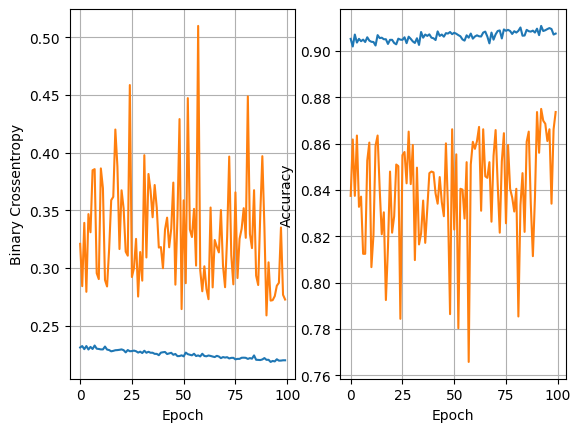

In [31]:
plot_history(history)

In [34]:
def train_model(x_train, y_train, num_nodes, dropout_rate, lr, batch_size, epochs): 
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),   
        tf.keras.layers.Dropout(dropout_rate),  # Dont train certain neurons
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)  # validation_data is used to evaluate the model at the end of each epoch

    return nn_model, history

16 nodes, 0 dropout, 0.1 learning rate, 32 batch size


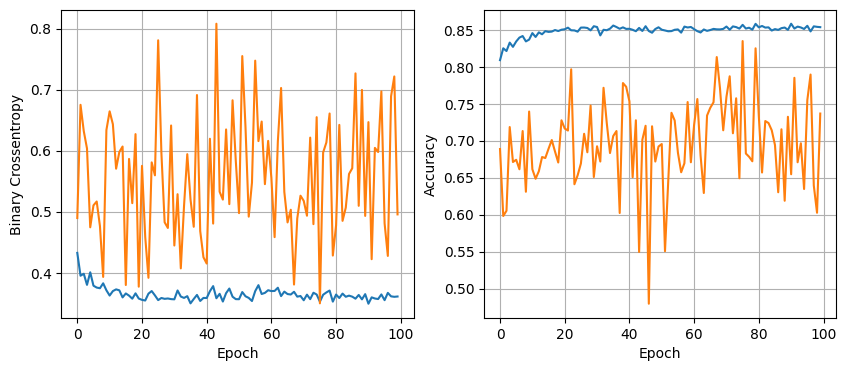

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8475 - loss: 0.3702
New best model with validation loss: 0.35484227538108826
16 nodes, 0 dropout, 0.1 learning rate, 64 batch size


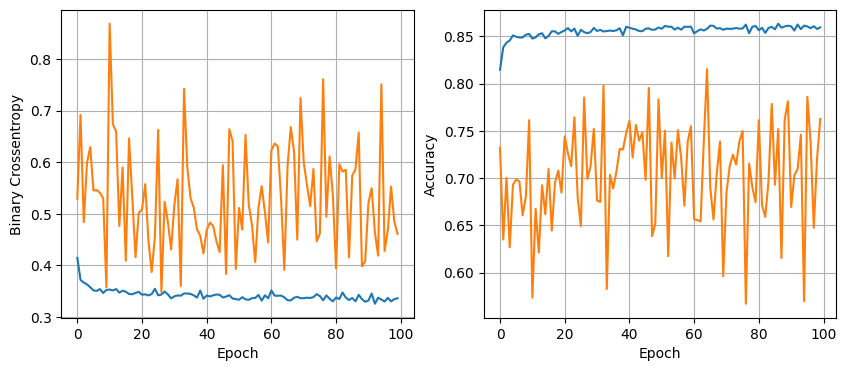

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.8581 - loss: 0.3523
New best model with validation loss: 0.3368665277957916
16 nodes, 0 dropout, 0.1 learning rate, 128 batch size


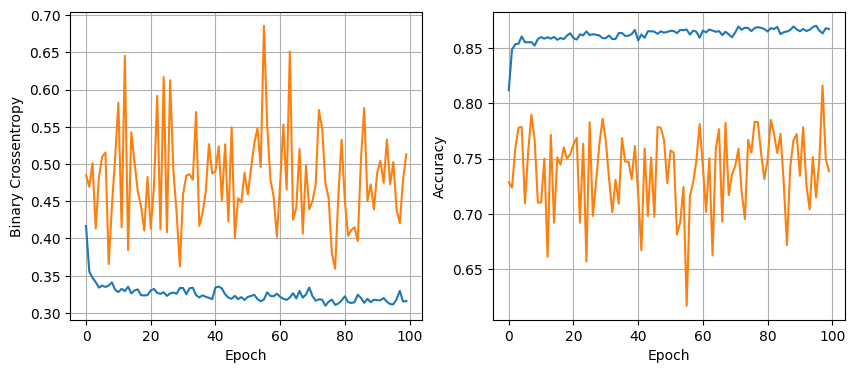

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8559 - loss: 0.3571
16 nodes, 0 dropout, 0.005 learning rate, 32 batch size


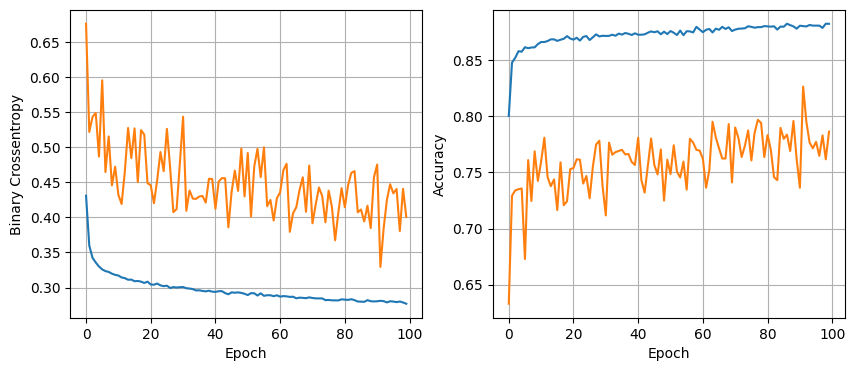

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8705 - loss: 0.3375
New best model with validation loss: 0.3342832028865814
16 nodes, 0 dropout, 0.005 learning rate, 64 batch size


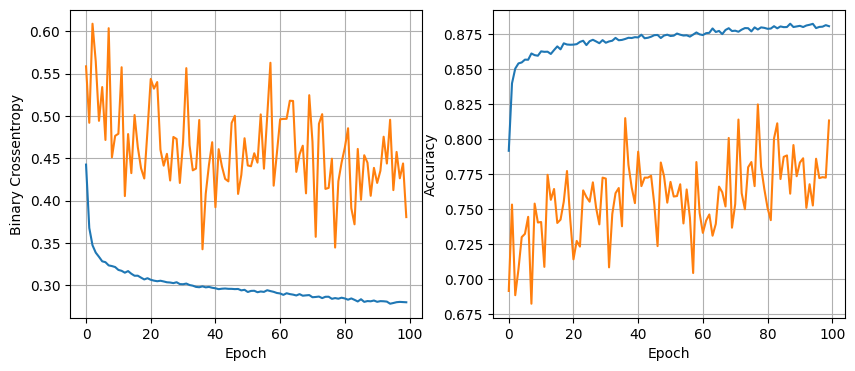

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8697 - loss: 0.3345
New best model with validation loss: 0.3237006366252899
16 nodes, 0 dropout, 0.005 learning rate, 128 batch size


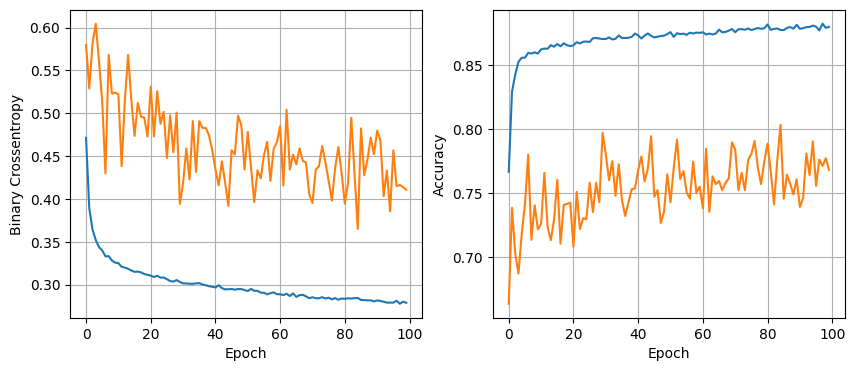

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8721 - loss: 0.3174
New best model with validation loss: 0.3174356520175934
16 nodes, 0 dropout, 0.001 learning rate, 32 batch size


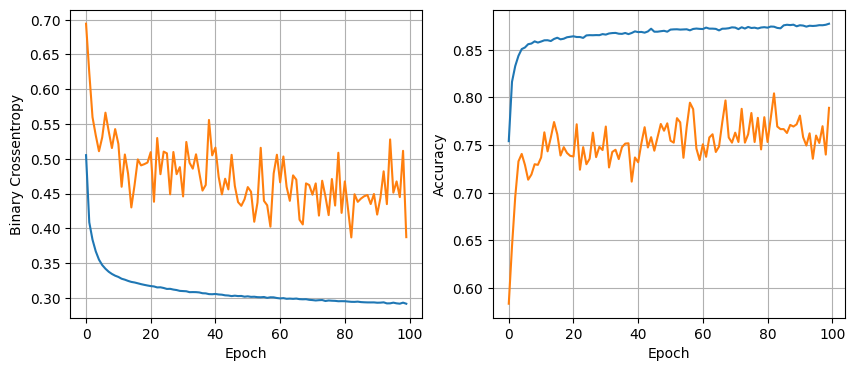

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8623 - loss: 0.3274
16 nodes, 0 dropout, 0.001 learning rate, 64 batch size


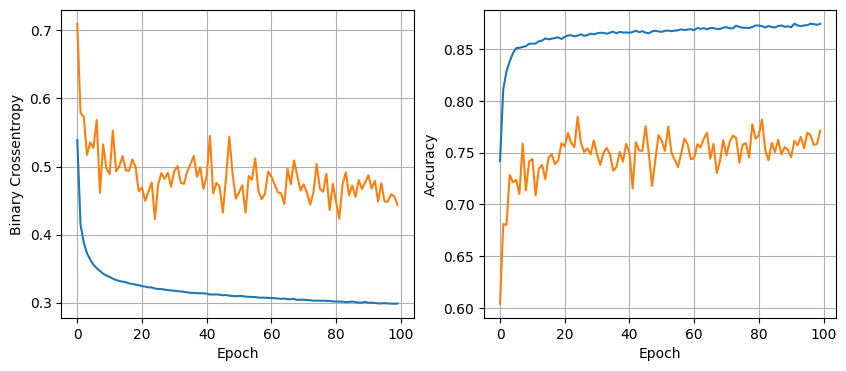

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8683 - loss: 0.3268
New best model with validation loss: 0.3166881501674652
16 nodes, 0 dropout, 0.001 learning rate, 128 batch size


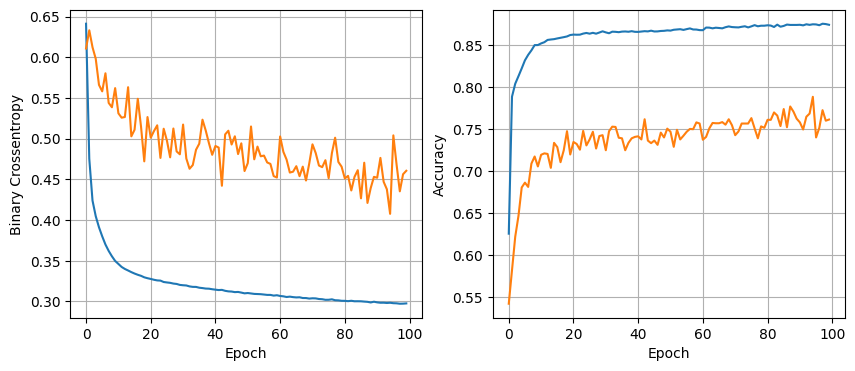

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8657 - loss: 0.3264
16 nodes, 0.2 dropout, 0.1 learning rate, 32 batch size


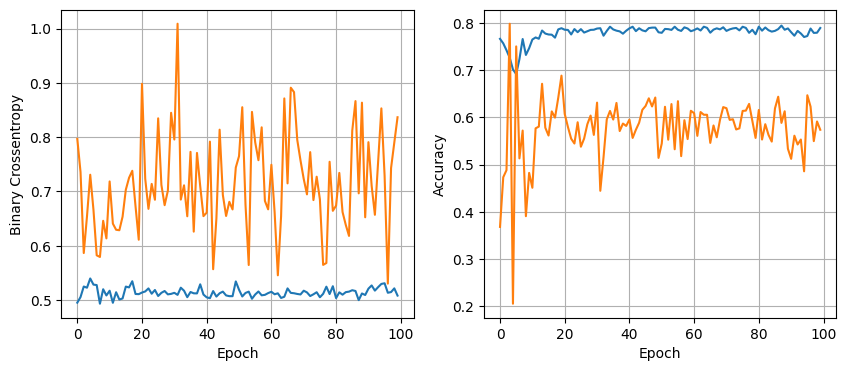

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8362 - loss: 0.4401
16 nodes, 0.2 dropout, 0.1 learning rate, 64 batch size


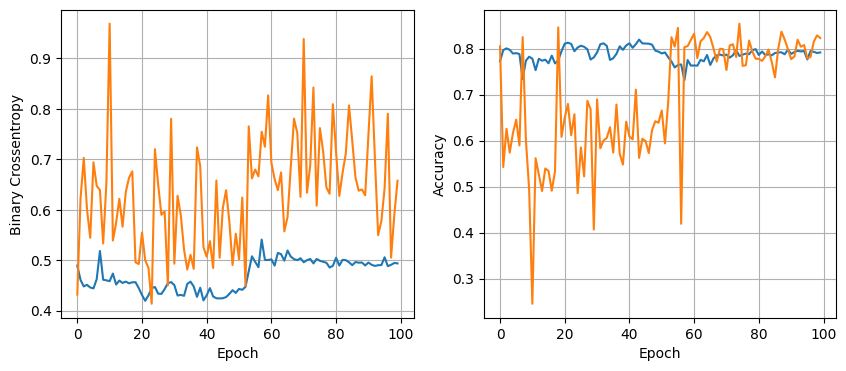

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8033 - loss: 0.4445
16 nodes, 0.2 dropout, 0.1 learning rate, 128 batch size


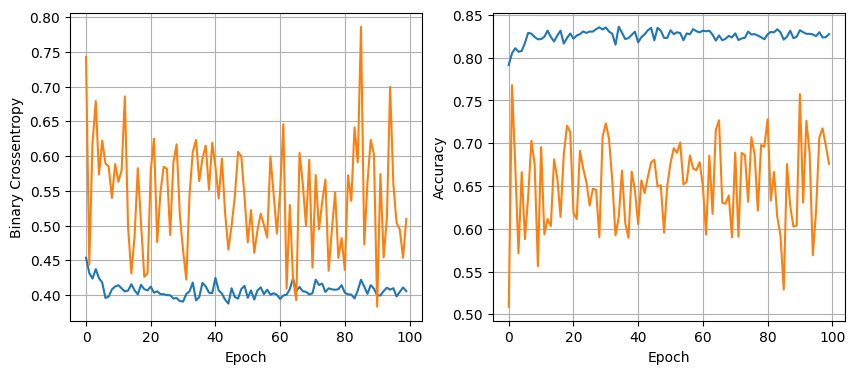

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.8560 - loss: 0.3658
16 nodes, 0.2 dropout, 0.005 learning rate, 32 batch size


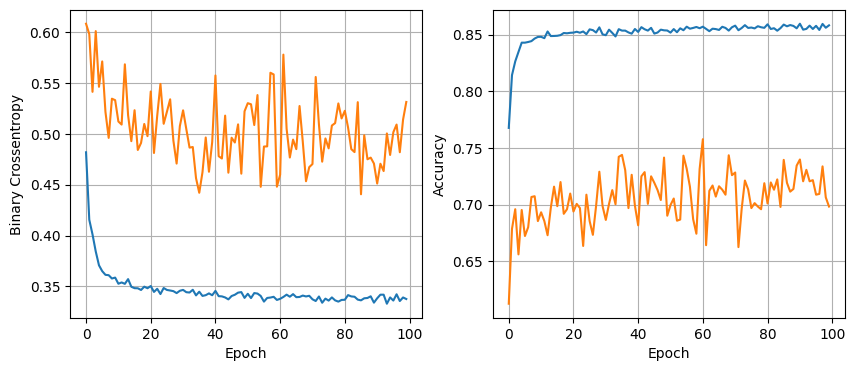

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8662 - loss: 0.3329
16 nodes, 0.2 dropout, 0.005 learning rate, 64 batch size


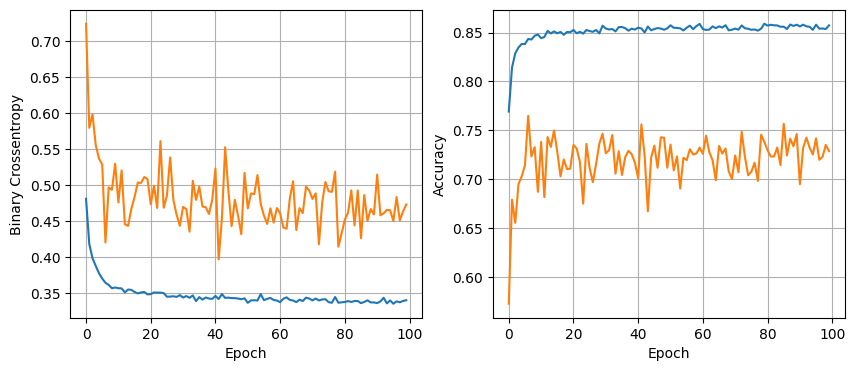

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8698 - loss: 0.3307
16 nodes, 0.2 dropout, 0.005 learning rate, 128 batch size


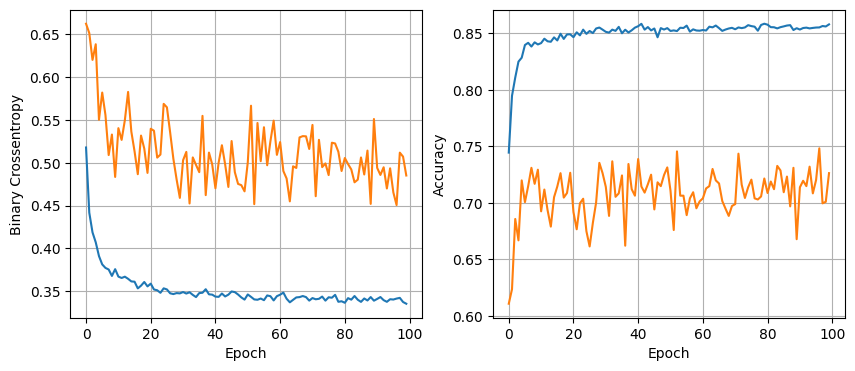

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8591 - loss: 0.3283
16 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


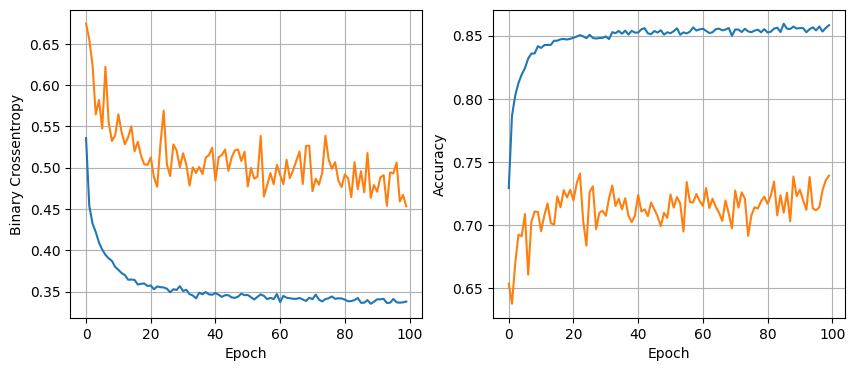

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8632 - loss: 0.3327
16 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


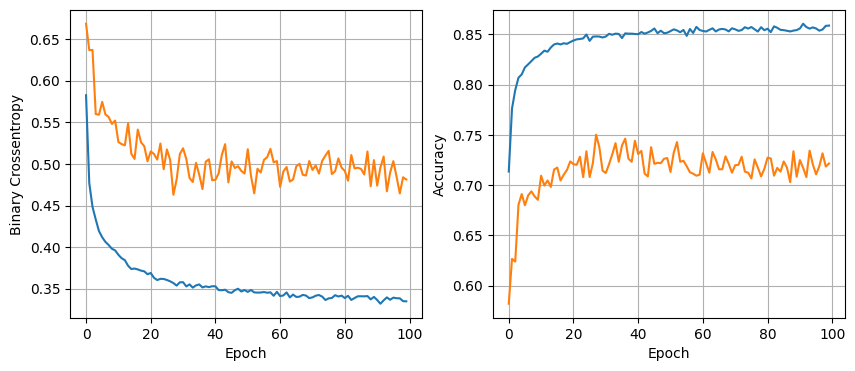

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8721 - loss: 0.3231
16 nodes, 0.2 dropout, 0.001 learning rate, 128 batch size


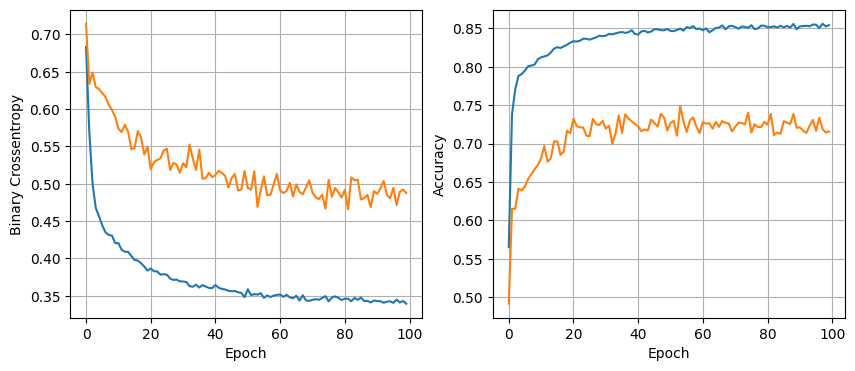

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8632 - loss: 0.3324
32 nodes, 0 dropout, 0.1 learning rate, 32 batch size


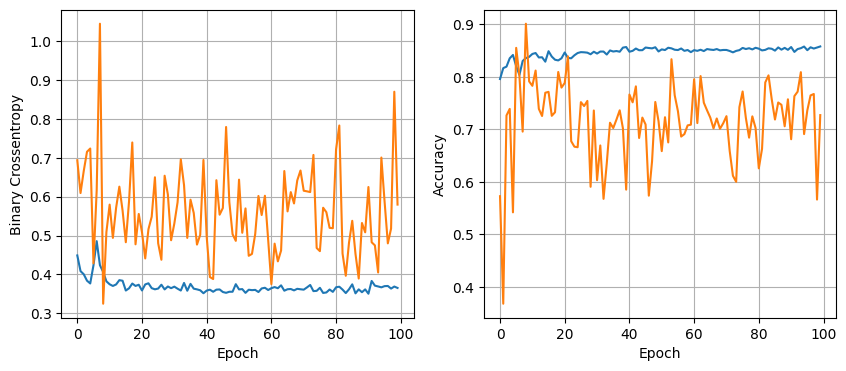

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8563 - loss: 0.3640
32 nodes, 0 dropout, 0.1 learning rate, 64 batch size


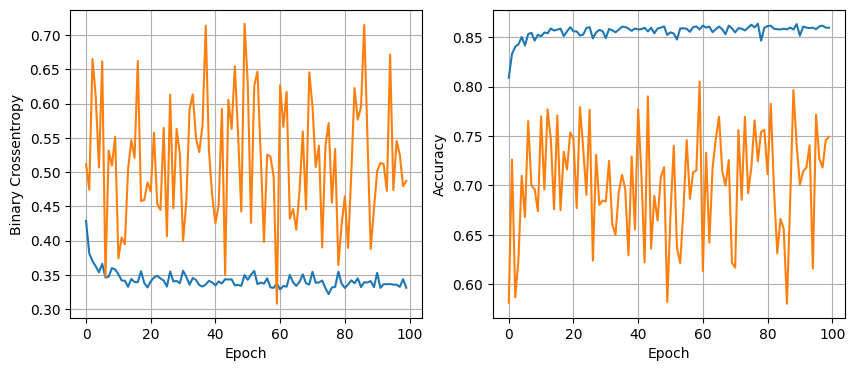

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.8634 - loss: 0.3570
32 nodes, 0 dropout, 0.1 learning rate, 128 batch size


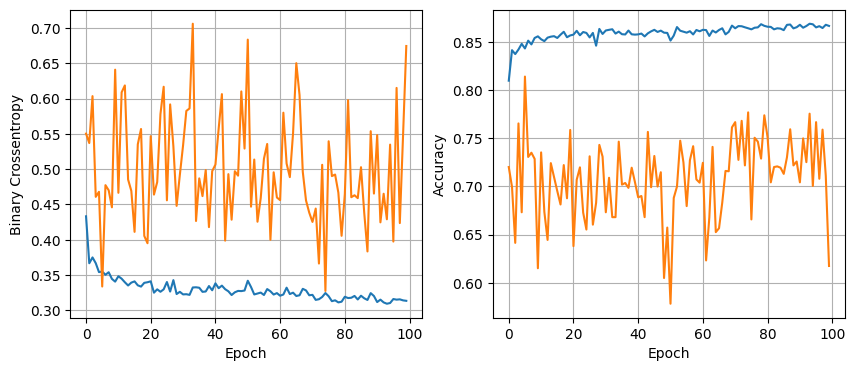

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.8516 - loss: 0.3589
32 nodes, 0 dropout, 0.005 learning rate, 32 batch size


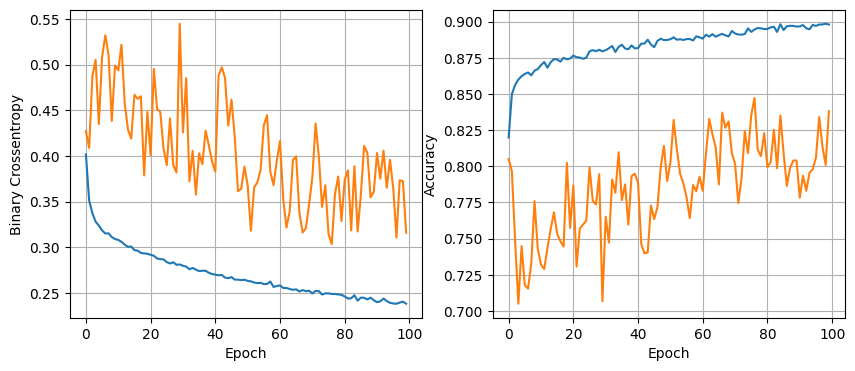

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8548 - loss: 0.3943
32 nodes, 0 dropout, 0.005 learning rate, 64 batch size


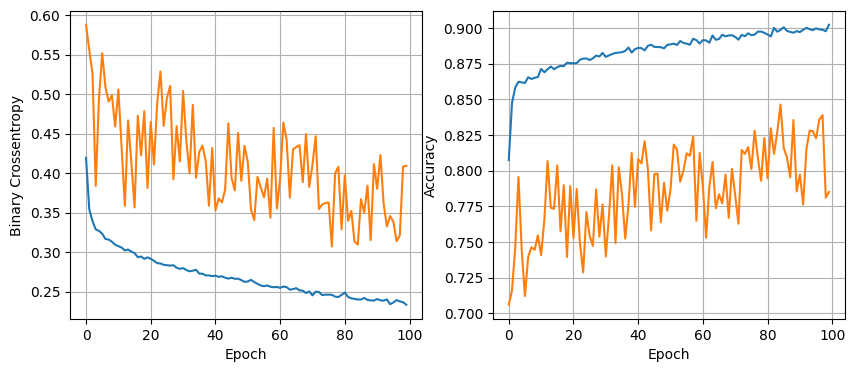

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8654 - loss: 0.3582
32 nodes, 0 dropout, 0.005 learning rate, 128 batch size


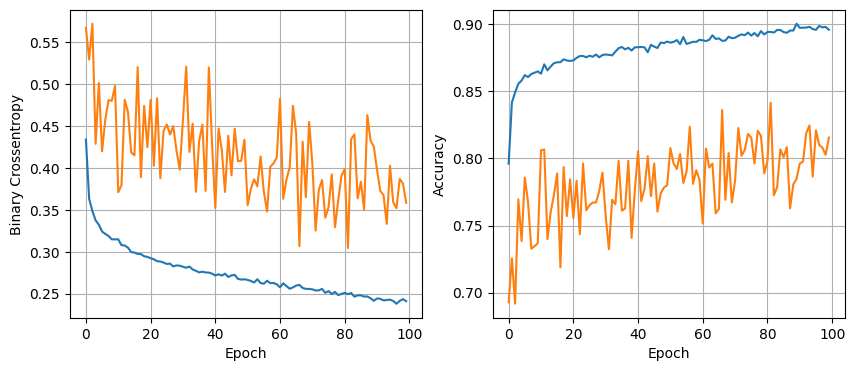

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.8664 - loss: 0.3519
32 nodes, 0 dropout, 0.001 learning rate, 32 batch size


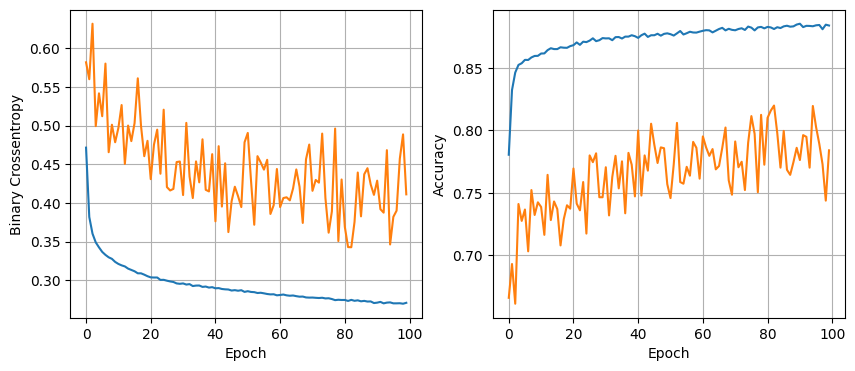

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8699 - loss: 0.3360
32 nodes, 0 dropout, 0.001 learning rate, 64 batch size


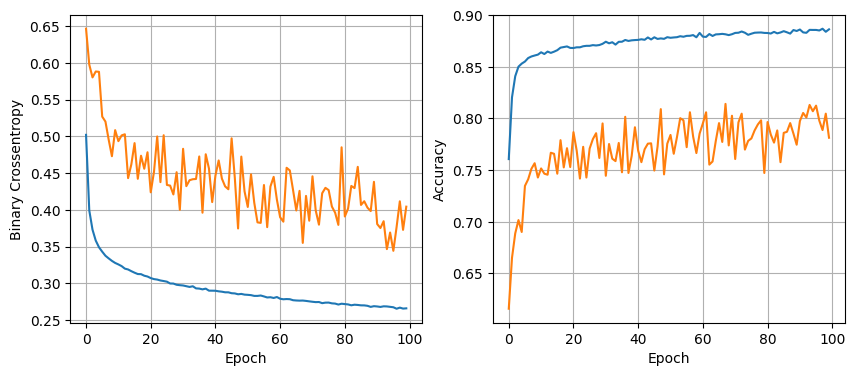

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8703 - loss: 0.3259
32 nodes, 0 dropout, 0.001 learning rate, 128 batch size


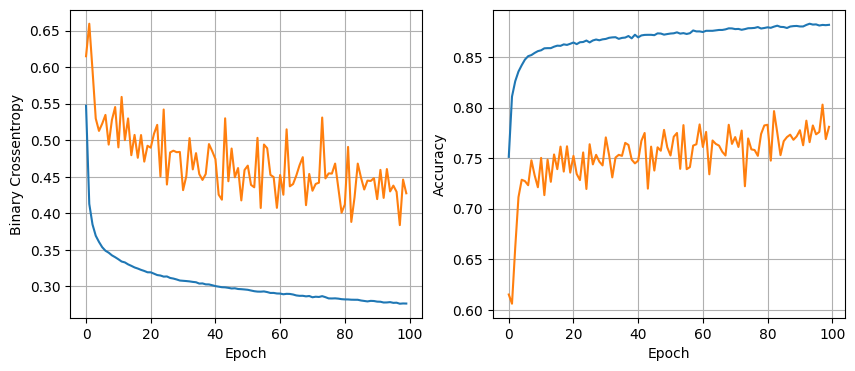

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8766 - loss: 0.3259
32 nodes, 0.2 dropout, 0.1 learning rate, 32 batch size


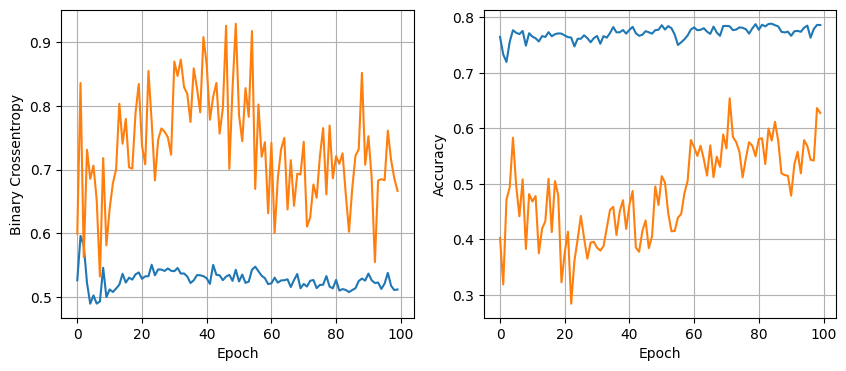

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8325 - loss: 0.4810
32 nodes, 0.2 dropout, 0.1 learning rate, 64 batch size


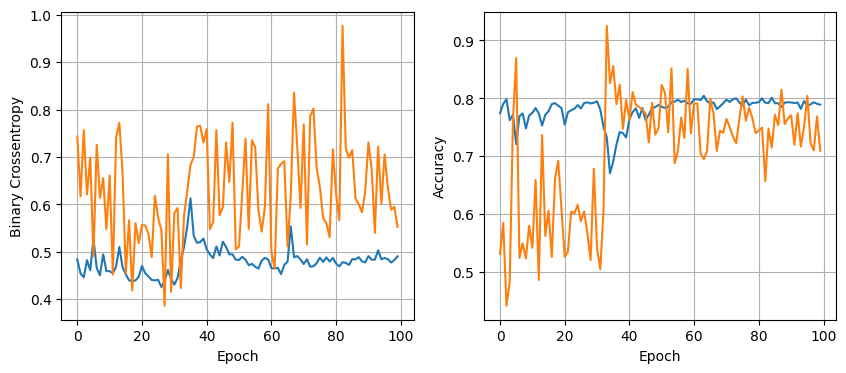

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.8390 - loss: 0.4229
32 nodes, 0.2 dropout, 0.1 learning rate, 128 batch size


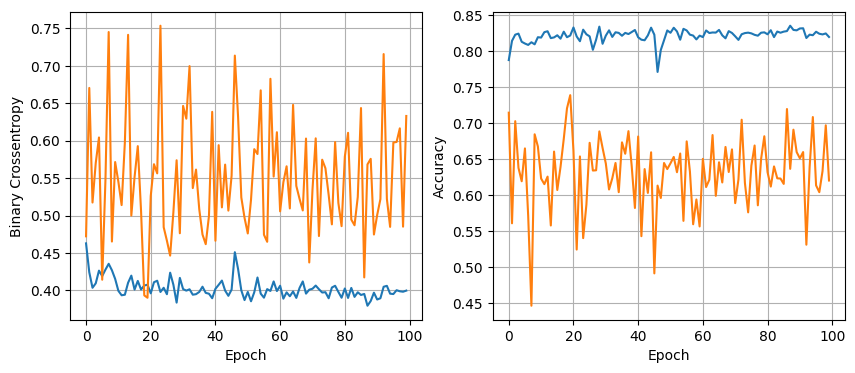

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8448 - loss: 0.3797
32 nodes, 0.2 dropout, 0.005 learning rate, 32 batch size


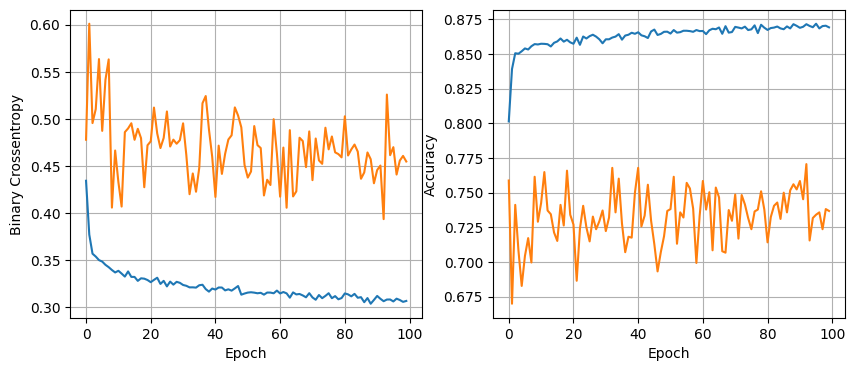

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8713 - loss: 0.3082
New best model with validation loss: 0.3081114888191223
32 nodes, 0.2 dropout, 0.005 learning rate, 64 batch size


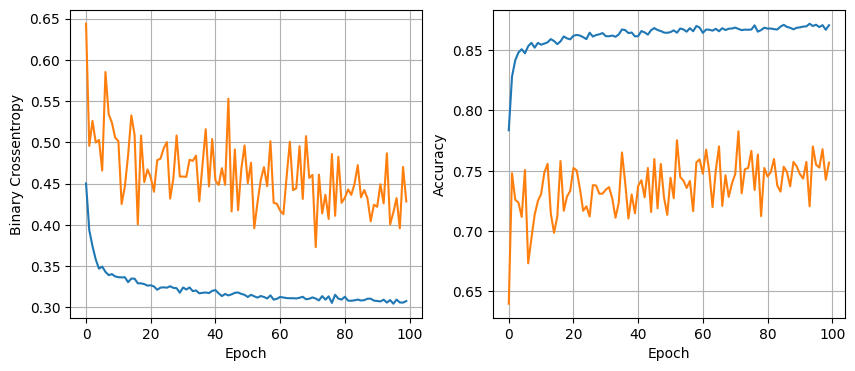

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8780 - loss: 0.3137
32 nodes, 0.2 dropout, 0.005 learning rate, 128 batch size


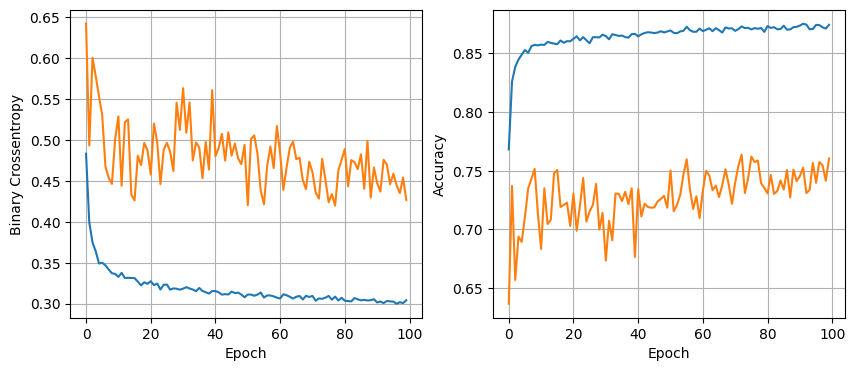

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.3165
32 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


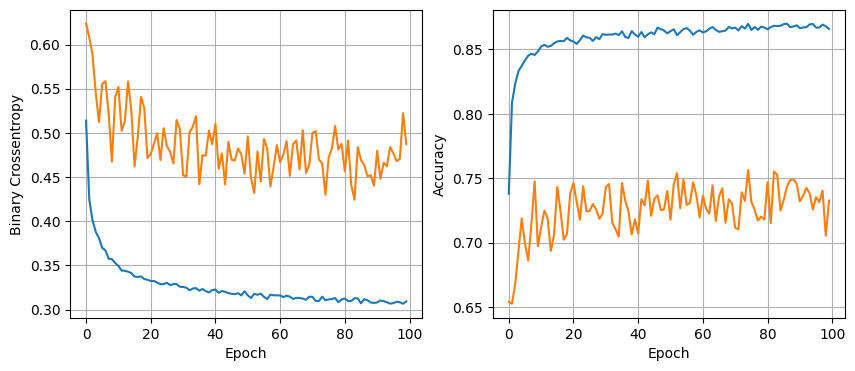

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8742 - loss: 0.3157
32 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


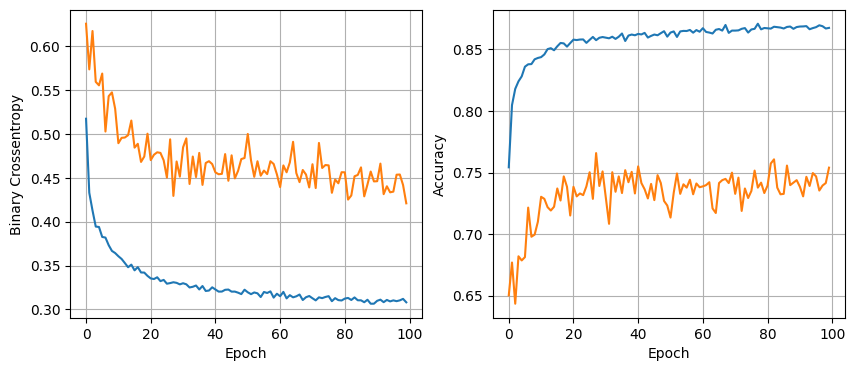

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8742 - loss: 0.3221
32 nodes, 0.2 dropout, 0.001 learning rate, 128 batch size


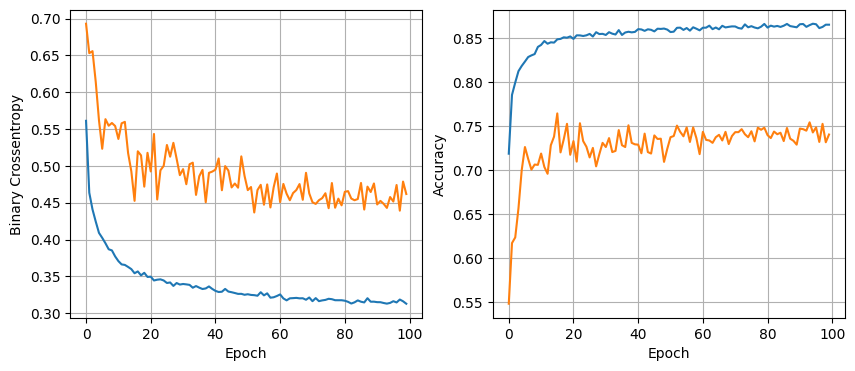

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8741 - loss: 0.3186
64 nodes, 0 dropout, 0.1 learning rate, 32 batch size


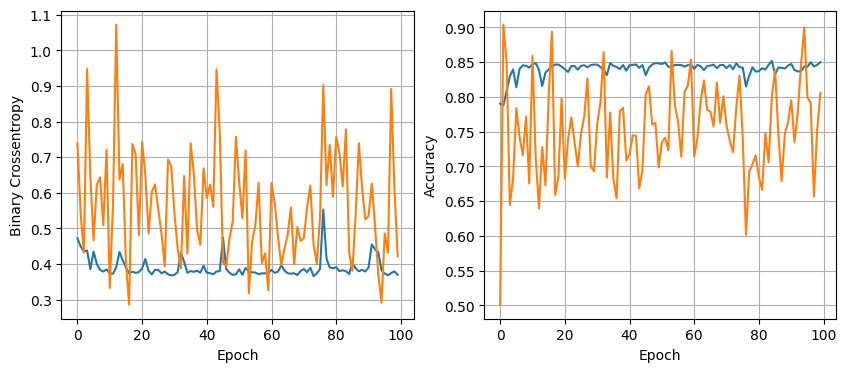

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8487 - loss: 0.3542
64 nodes, 0 dropout, 0.1 learning rate, 64 batch size


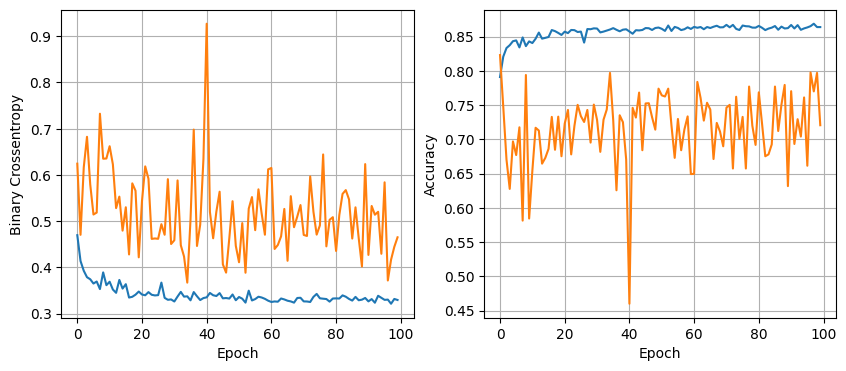

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8651 - loss: 0.3665
64 nodes, 0 dropout, 0.1 learning rate, 128 batch size


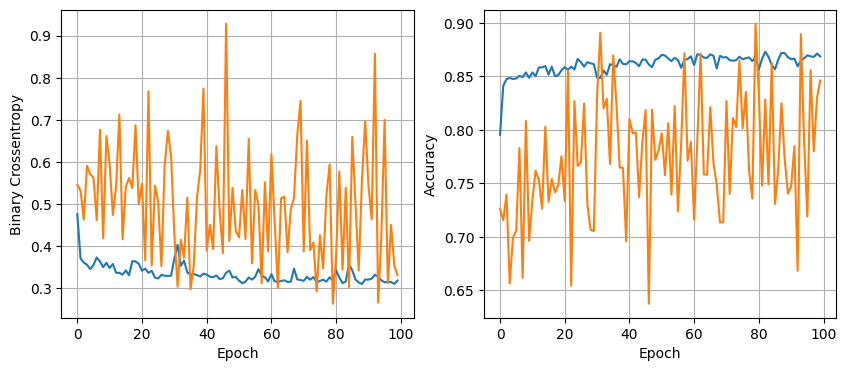

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8602 - loss: 0.3319
64 nodes, 0 dropout, 0.005 learning rate, 32 batch size


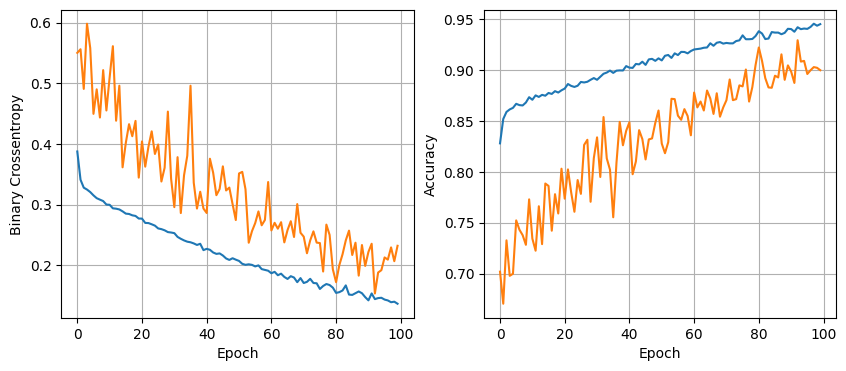

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8566 - loss: 0.6836
64 nodes, 0 dropout, 0.005 learning rate, 64 batch size


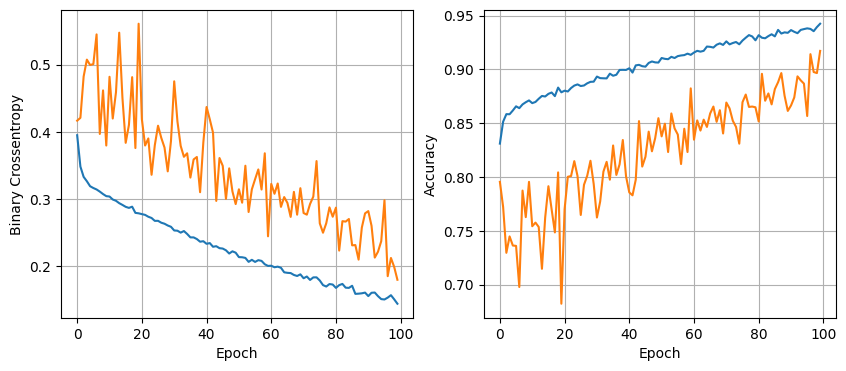

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.8594 - loss: 0.5363
64 nodes, 0 dropout, 0.005 learning rate, 128 batch size


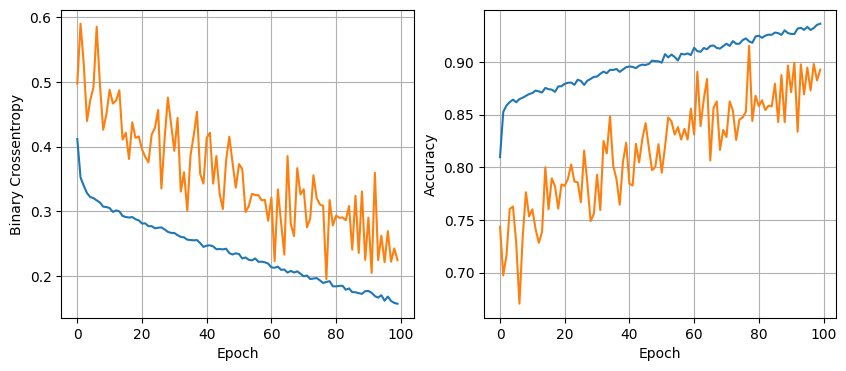

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8437 - loss: 0.5263
64 nodes, 0 dropout, 0.001 learning rate, 32 batch size


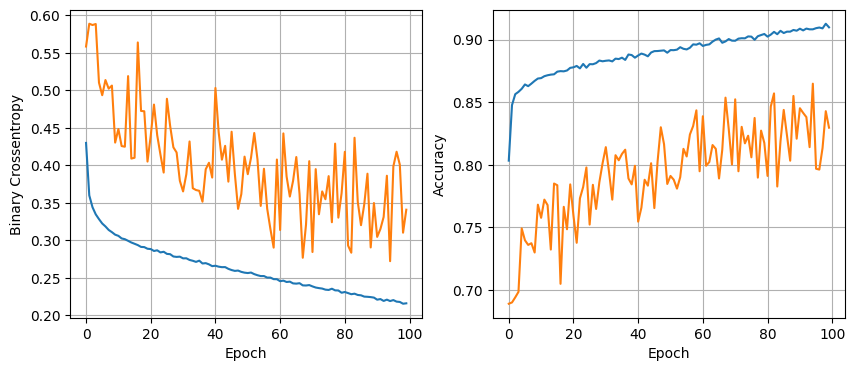

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8693 - loss: 0.3555
64 nodes, 0 dropout, 0.001 learning rate, 64 batch size


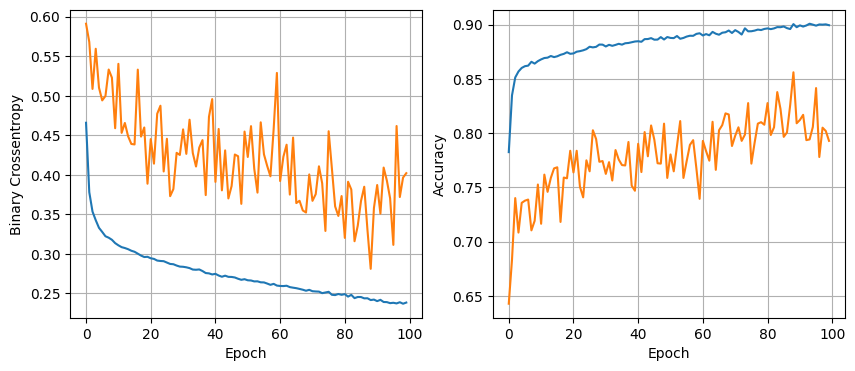

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8682 - loss: 0.3455
64 nodes, 0 dropout, 0.001 learning rate, 128 batch size


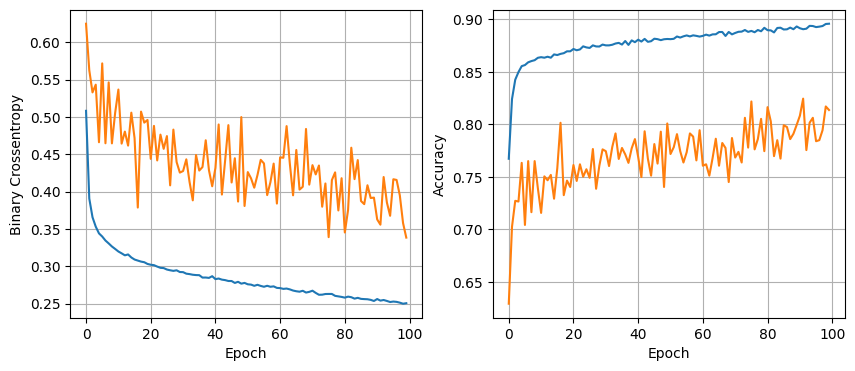

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - loss: 0.3447
64 nodes, 0.2 dropout, 0.1 learning rate, 32 batch size


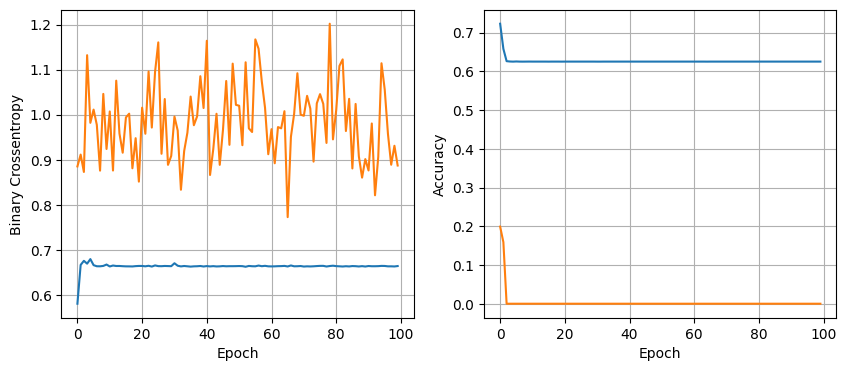

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.6481 - loss: 0.6561
64 nodes, 0.2 dropout, 0.1 learning rate, 64 batch size


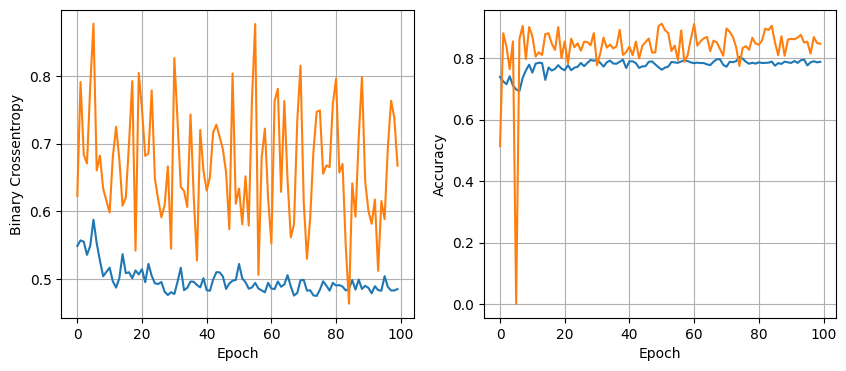

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.7878 - loss: 0.4561
64 nodes, 0.2 dropout, 0.1 learning rate, 128 batch size


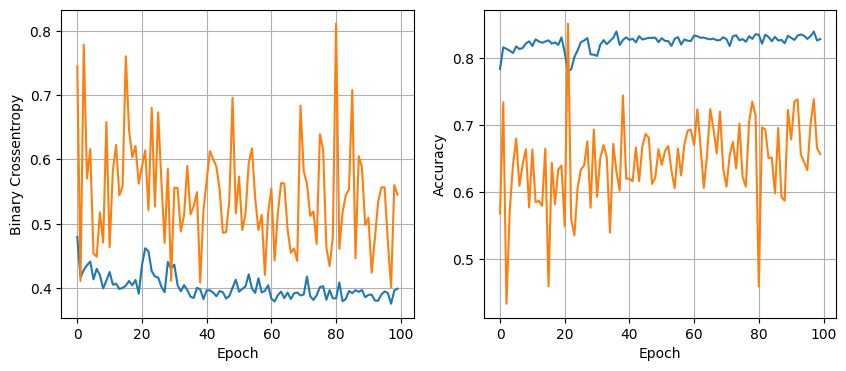

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3593
64 nodes, 0.2 dropout, 0.005 learning rate, 32 batch size


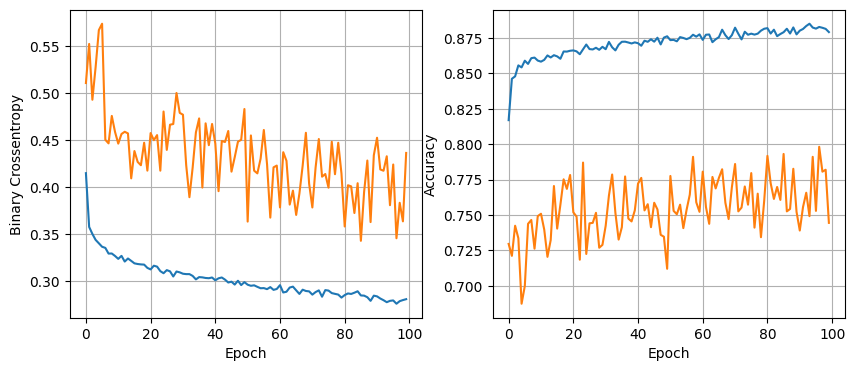

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8713 - loss: 0.3262
64 nodes, 0.2 dropout, 0.005 learning rate, 64 batch size


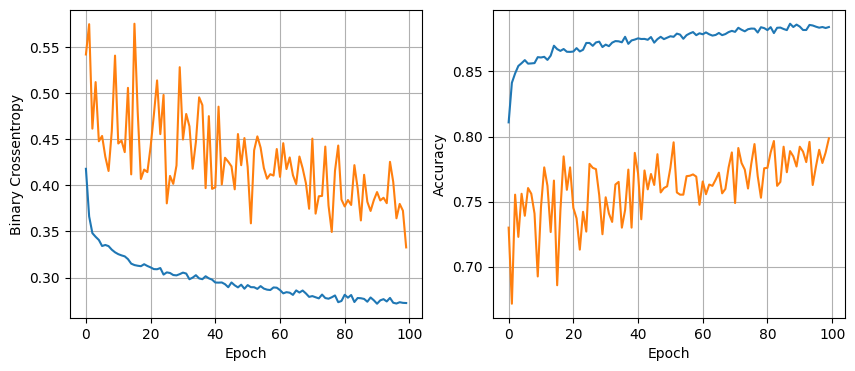

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8766 - loss: 0.3135
New best model with validation loss: 0.305497407913208
64 nodes, 0.2 dropout, 0.005 learning rate, 128 batch size


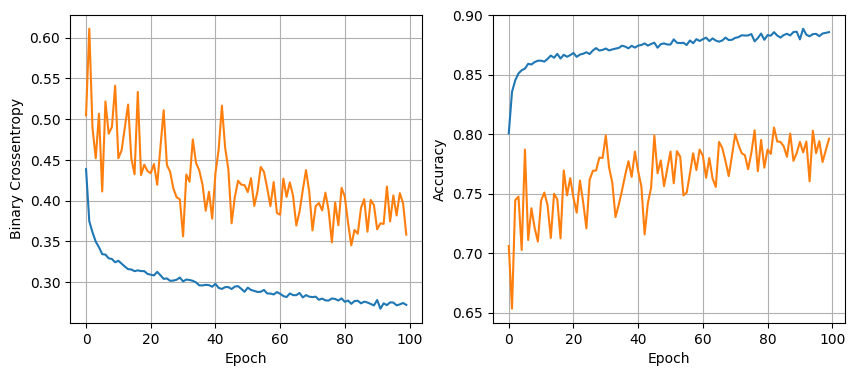

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8809 - loss: 0.3142
64 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


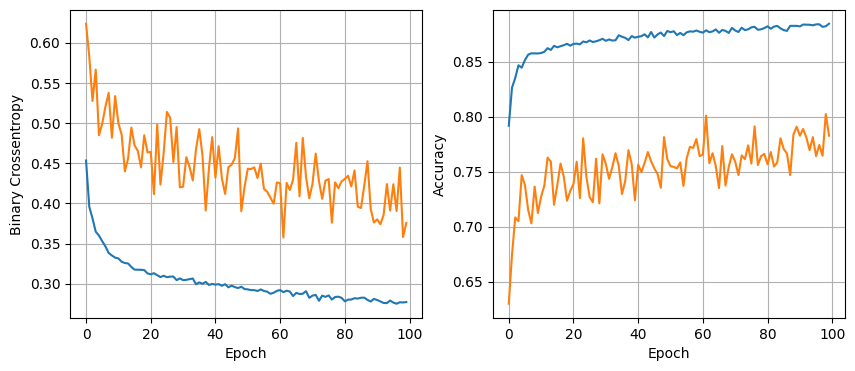

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8765 - loss: 0.3077
New best model with validation loss: 0.3014974594116211
64 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


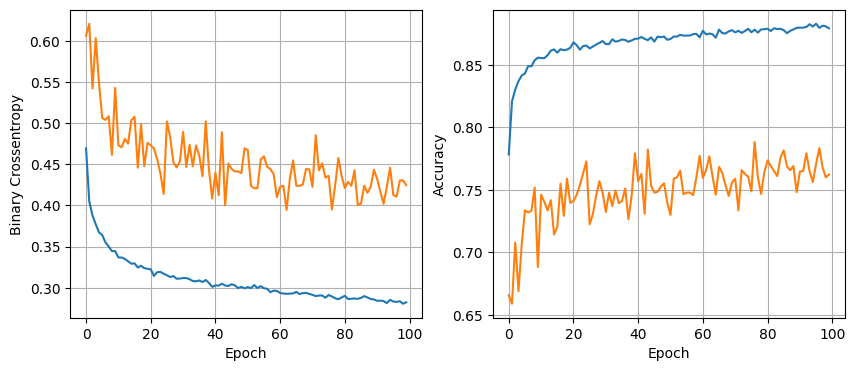

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8785 - loss: 0.3029
New best model with validation loss: 0.2980234920978546
64 nodes, 0.2 dropout, 0.001 learning rate, 128 batch size


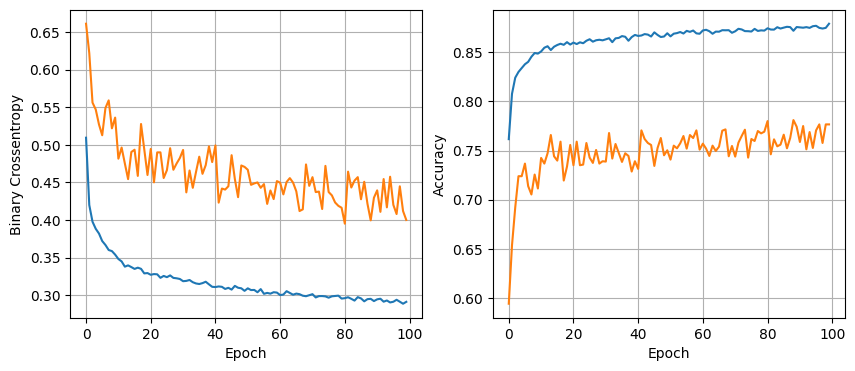

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8776 - loss: 0.3066


In [37]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_rate in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, {dropout_rate} dropout, {lr} learning rate, {batch_size} batch size")
                model, history = train_model(x_train, y_train, num_nodes, dropout_rate, lr, batch_size, epochs)
                plot_history (history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                
                if (val_loss < least_val_loss):
                    least_val_loss = val_loss 
                    least_loss_model = model
                    print(f"New best model with validation loss: {least_val_loss}")
        